# MDOF to equivalent SDOF using the first mode only

This IPython notebook converts a pushover curve for an MDOF system into an equivalent SDOF capacity curve, considering the first mode of vibration only. The supplied pushover curve, which can be both in terms of base shear and roof displacement (`Vb-droof`) and base shear and floor displacements (`Vb-dfloor`), is transformed into an equivalent SDOF capacity curve, which is in terms of spectral acceleration and spectral displacement.

Note that this method assumes that the first mode shape Φ has been normalised to unit amplitude at the roof, i.e. Φn = 1, where n denotes the roof level.

The user has the option to derive the yielding Sa and Sd, if needed, using an idealisation of the sdof capacity curve, either bilinear or quadrilinear. To do so set the variable `idealised_type` to `'quadrilinear'` or `'bilinear'`, if the idealisation is not required then set it to `'none'`.

In [20]:
%matplotlib inline
from rmtk.vulnerability.common import utils
from rmtk.vulnerability.mdof_to_sdof.first_mode import first_mode

In [21]:
pushover_file = "../../../../../rmtk_data/capacity_curves_Vb-dfloor.csv"
idealised_type = 'quadrilinear'; # 'bilinear', 'quadrilinear' or 'none'

capacity_curves = utils.read_capacity_curves(pushover_file)
[sdof_capacity_curves, sdof_idealised_capacity] = first_mode.mdof_to_sdof(capacity_curves, idealised_type)

## Save capacity curves

Please define what capacity curve should be saved assigning the variable `capacity_to_save` one of the following:
1. `capacity_to_save = sdof_idealised_capacity`: idealised capacity curve is saved. If `idealised_type` was previously set to `none`, an error will be raised because the variable `sdof_idealised_capacity` is empty.
2. `capacity_to_save = sdof_capacity_curves`: full capacity curve is saved.

In [22]:
capacity_to_save = sdof_idealised_capacity

utils.save_SdSa_capacity_curves(capacity_to_save,'../../../../../rmtk_data/capacity_curves_sdof_first_mode.csv')

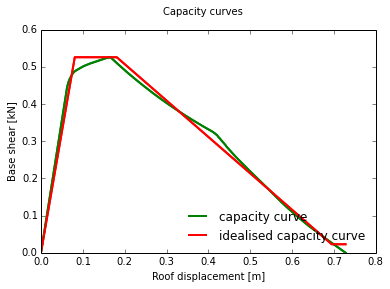

In [23]:
if idealised_type is not 'none':
    idealised_capacity = utils.idealisation(idealised_type, sdof_capacity_curves)
    utils.plot_idealised_capacity(idealised_capacity, sdof_capacity_curves, idealised_type)
else:
    utils.plot_capacity_curves(capacity_curves)
    utils.plot_capacity_curves(sdof_capacity_curves)

## Defined deformed shape for converting ISD damage model

This function allows to define the relationship between the maximum Inter-Storey Drift (ISD) along the building height and spectral displacement. This relationship serves the purpuse of converting interstorey drift damage thresholds to spectral displacement damage threshold, if `damage_model['type']=interstorey drift` of the MDOF system wants to be used for the equivalent SDOF system. 

If `capacity_curves['type'] = 'Vb-dfloor'` the relationship is extracted from the displacement at each storey, otherwise a linear relationship is assumed.

In [24]:
deformed_shape_file =  "../../../../../rmtk_data/ISD_Sd.csv"

[ISD_vectors, Sd_vectors] = first_mode.define_deformed_shape(capacity_curves, deformed_shape_file)